In [4]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from efficiency import *
from isolation import *

import matplotlib as mpl

mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('axes', labelsize=16, titlesize=20)
mpl.rcParams["legend.title_fontsize"]=18

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [5]:
C = 29.9792458 #cm/ns

In [6]:
import os
os.listdir("new_root_files")

['.sys.v#.harvest_all.root',
 '.sys.v#.histo_100pi_path.root',
 '.sys.v#.histo_100pi_path_release.root',
 '.sys.v#.histo_4Pi_NEW_1s.root',
 '.sys.v#.histo_4Pi_NEW_2s.root',
 '.sys.v#.histo_Pi_pt100_eta2.root',
 '.sys.v#.histo_Pi_pt100_eta27.root',
 '.sys.v#.histo_Pi_pt100_eta2_newPath.root',
 '.sys.v#.histo_Pi_pt20_eta2.root',
 '.sys.v#.histo_Pi_pt50_eta2.root',
 '.sys.v#.histo_SinglePi_pt20to100_eta17to27_NEW.root',
 '.sys.v#.histo_cone_new.root',
 '.sys.v#.histo_cone_release.root',
 '.sys.v#.histo_no_time.root',
 '.sys.v#.histo_ph_rechits.root',
 '.sys.v#.histo_photon_rechits.root',
 '.sys.v#.histo_pion_rechits.root',
 '.sys.v#.histo_rel.root',
 '.sys.v#.histo_time_2s.root',
 '.sys.v#.histo_time_3s.root',
 'D95',
 'D98',
 'D99',
 'harvest_all.root',
 'histo_100pi_path.root',
 'histo_100pi_path_release.root',
 'histo_4Pi_NEW_1s.root',
 'histo_4Pi_NEW_2s.root',
 'histo_Pi_pt100_eta2.root',
 'histo_Pi_pt100_eta27.root',
 'histo_Pi_pt100_eta2_newPath.root',
 'histo_Pi_pt20_eta2.root',
 '

In [8]:
filename = 'new_root_files/histo_100pi_path.root'
# filename = 'new_root_files/histo_SinglePi_pt20_eta2.root'
file = uproot.open(filename)

In [9]:
file.keys()

['ticlDumper;1',
 'ticlDumper/tracksters;1',
 'ticlDumper/clusters;1',
 'ticlDumper/candidates;1',
 'ticlDumper/trackstersMerged;1',
 'ticlDumper/associations;1',
 'ticlDumper/simtrackstersSC;1',
 'ticlDumper/simtrackstersCP;1',
 'ticlDumper/tracks;1',
 'ticlDumper/simTICLCandidate;1']

In [10]:
# filename2 = 'new_root_files/histo_100pi_path.root'
# file2 = uproot.open(filename2)
# TICLCandidate2 = file2["ticlDumper/candidates"]
# simTICLCandidate2 = file2["ticlDumper/simTICLCandidate"]
# candidate_time2          = TICLCandidate2["candidate_time"].array()
# candidate_timeErr2       = TICLCandidate2["candidate_timeErr"].array()

In [11]:
simtrackstersSC = file["ticlDumper/simtrackstersSC"]
simtrackstersCP = file["ticlDumper/simtrackstersCP"]
tracksters  = file["ticlDumper/tracksters"]
trackstersMerged = file["ticlDumper/trackstersMerged"]
associations = file["ticlDumper/associations"]
tracks = file["ticlDumper/tracks"]
simTICLCandidate = file["ticlDumper/simTICLCandidate"]
TICLCandidate = file["ticlDumper/candidates"]
clusters = file["ticlDumper/clusters"]

In [12]:
tracks.keys()

['event',
 'track_id',
 'track_hgcal_x',
 'track_hgcal_y',
 'track_hgcal_z',
 'track_hgcal_eta',
 'track_hgcal_phi',
 'track_hgcal_pt',
 'track_pt',
 'track_missing_outer_hits',
 'track_quality',
 'track_charge',
 'track_time',
 'track_time_quality',
 'track_time_err',
 'track_beta',
 'track_time_mtd',
 'track_time_mtd_err',
 'track_pos_mtd',
 'track_pos_mtd/track_pos_mtd.theVector.theX',
 'track_pos_mtd/track_pos_mtd.theVector.theY',
 'track_pos_mtd/track_pos_mtd.theVector.theZ',
 'track_nhits']

In [13]:
simTICLCandidate.keys()

['simTICLCandidate_raw_energy',
 'simTICLCandidate_regressed_energy',
 'simTICLCandidate_simTracksterCPIndex',
 'simTICLCandidate_boundaryX',
 'simTICLCandidate_boundaryY',
 'simTICLCandidate_boundaryZ',
 'simTICLCandidate_boundaryPx',
 'simTICLCandidate_boundaryPy',
 'simTICLCandidate_boundaryPz',
 'simTICLCandidate_boundary_time',
 'simTICLCandidate_vertex_time',
 'simTICLCandidate_time',
 'simTICLCandidate_t0Mtd',
 'simTICLCandidate_tMtd',
 'simTICLCandidate_betaMtd',
 'simTICLCandidate_pathMtd',
 'simTICLCandidate_tMtdPos',
 'simTICLCandidate_tMtdPos/simTICLCandidate_tMtdPos.theVector.theX',
 'simTICLCandidate_tMtdPos/simTICLCandidate_tMtdPos.theVector.theY',
 'simTICLCandidate_tMtdPos/simTICLCandidate_tMtdPos.theVector.theZ',
 'simTICLCandidate_caloParticleMass',
 'simTICLCandidate_pdgId',
 'simTICLCandidate_charge',
 'simTICLCandidate_track_in_candidate']

In [14]:
track_pt = tracks["track_pt"].array()
track_id = tracks["track_id"].array()

track_hgcal_eta = tracks["track_hgcal_eta"].array()
track_hgcal_pt = tracks["track_hgcal_pt"].array()

# track_boundaryX = simtrackstersSC["track_boundaryX"].array()
# track_boundaryY = simtrackstersSC["track_boundaryY"].array()
# track_boundaryZ = simtrackstersSC["track_boundaryZ"].array()

In [15]:
# cluster_number_of_hits = clusters["cluster_number_of_hits"].array()
# cluster_layer_id = clusters["cluster_layer_id"].array()
# cluster_type = clusters["cluster_type"].array()

In [16]:
simTICLCandidate_raw_energy = simTICLCandidate['simTICLCandidate_raw_energy'].array()
simTICLCandidate_regressed_energy = simTICLCandidate['simTICLCandidate_regressed_energy'].array()
simTICLCandidate_track_in_candidate = simTICLCandidate['simTICLCandidate_track_in_candidate'].array()

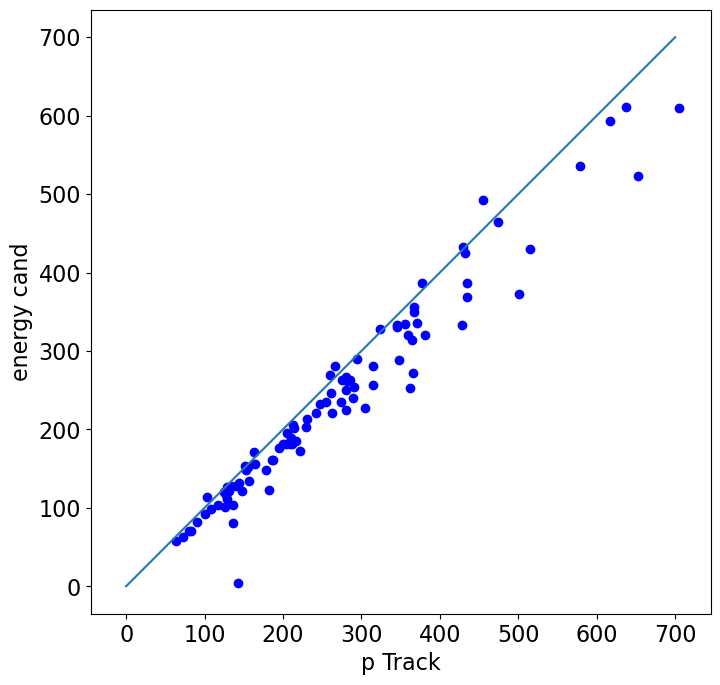

In [17]:
plt.figure(figsize=(8,8), dpi=100)
for tk_in_cand, cand_ene, trk_pt, trk_eta, trk_id in zip(simTICLCandidate_track_in_candidate, simTICLCandidate_raw_energy, track_pt, track_hgcal_eta, track_id):
    for i, tk in enumerate(tk_in_cand):
        if tk != -1:
            id = np.where(trk_id==tk)[0][0]
            pt = trk_pt[id]
            eta = trk_eta[id]
            plt.scatter(pt*np.cosh(eta), cand_ene[i], c="blue")
plt.xlabel("p Track")
plt.ylabel("energy cand")
x = np.linspace(0,700,100)
plt.plot(x, x)
plt.axis("equal")
plt.xlim(0,700)
plt.show()

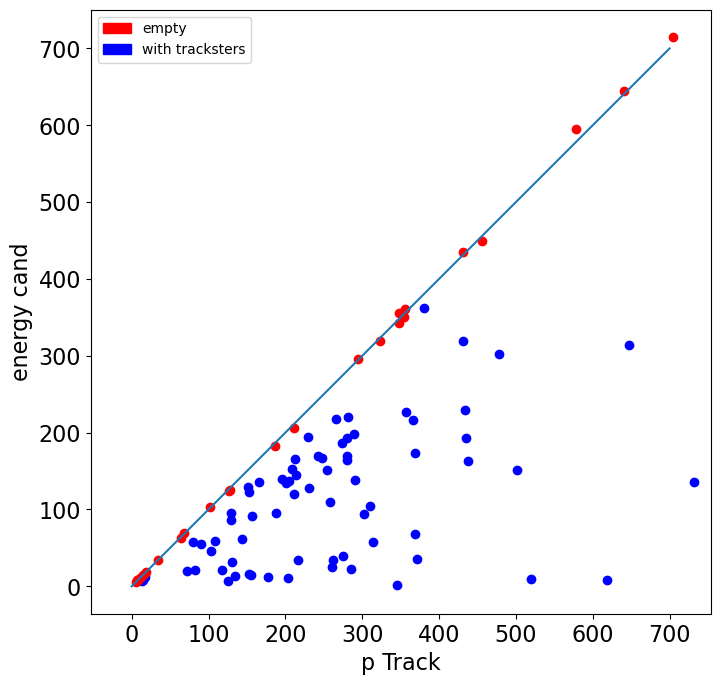

In [94]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8,8), dpi=100)
empty = [0,0]
with_ts = [0,0]
for tk_in_cand, ts_in_cand, cand_ene, trk_pt, trk_eta, trk_id in zip(track_in_candidate, tracksters_in_candidate, candidate_energy, track_hgcal_pt,track_hgcal_eta, track_id):
    for i, tk in enumerate(tk_in_cand):
        if tk != -1:
            id = np.where(trk_id==tk)[0][0]
            pt = trk_pt[id]
            eta = trk_eta[id]
            if len(ts_in_cand[i])== 0:
                plt.scatter(pt*np.cosh(eta), cand_ene[i], c="red")
                empty = [pt*np.cosh(eta), cand_ene[i]]
            else:
                plt.scatter(pt*np.cosh(eta), cand_ene[i], c="blue")
                with_ts = [pt*np.cosh(eta), cand_ene[i]]
plt.xlabel("p Track")
plt.ylabel("energy cand")
x = np.linspace(0,700,100)
plt.plot(x, x)
plt.axis("equal")
red_patch = mpatches.Patch(color='red', label='empty')
blue_patch = mpatches.Patch(color='blue', label='with tracksters')
plt.legend(handles=[red_patch,blue_patch])
plt.xlim(0,700)
plt.show()

In [46]:
candidate_pdgId         = TICLCandidate["candidate_pdgId"].array()
candidate_id_prob       = TICLCandidate["candidate_id_probabilities"].array()
tracksters_in_candidate = TICLCandidate["tracksters_in_candidate"].array()
track_in_candidate      = TICLCandidate["track_in_candidate"].array()
candidate_energy        = TICLCandidate["candidate_energy"].array()
candidate_time          = TICLCandidate["candidate_time"].array()
candidate_timeErr       = TICLCandidate["candidate_timeErr"].array()
# candidate_MTD_time0          = TICLCandidate["candidate_t0Mtd"].array()
# candidate_MTD_time0Err       = TICLCandidate["candidate_t0Mtd_err"].array()
# candidate_MTD_time          = TICLCandidate["candidate_tMtd"].array()
# candidate_MTD_timeErr       = TICLCandidate["candidate_tMtd_err"].array()
#NCandidates   = TICLCandidate["NCandidates"]

In [12]:
recoToSim_en    = associations["Mergetstracksters_recoToSim_SC_sharedE"].array()
recoToSim_score = associations["Mergetstracksters_recoToSim_SC_score"].array()
recoToSim_index = associations["Mergetstracksters_recoToSim_SC"].array()

simToReco_en    = associations["Mergetstracksters_simToReco_SC_sharedE"].array()
simToReco_score = associations["Mergetstracksters_simToReco_SC_score"].array()
simToReco_index = associations["Mergetstracksters_simToReco_SC"].array()

In [13]:
# tracksters_vx        = tracksters["vertices_x"].array()
# tracksters_vy        = tracksters["vertices_y"].array()
# tracksters_vz        = tracksters["vertices_z"].array()
# tracksters_ve        = tracksters["vertices_energy"].array()
# tracksters_vi        = tracksters["vertices_indexes"].array()
tracksters_vt        = tracksters["vertices_time"].array()
# tracksters_vtErr     = tracksters["vertices_timeErr"].array()
# tracksters_vm        = tracksters["vertices_multiplicity"].array()
# tracksters_bx        = tracksters["barycenter_x"].array()
# tracksters_by        = tracksters["barycenter_y"].array()
# tracksters_bz        = tracksters["barycenter_z"].array()
# tracksters_be        = tracksters["raw_energy"].array()
# tracksters_CALO_time = tracksters["time"].array()
# tracksters_CALO_err  = tracksters["timeError"].array()
# tracksters_EVx       = tracksters["eVector0_x"].array()
# tracksters_EVy       = tracksters["eVector0_y"].array()
# tracksters_EVz       = tracksters["eVector0_z"].array()

In [18]:
# trackstersMerged_vx          = trackstersMerged["vertices_x"].array()
# trackstersMerged_vy          = trackstersMerged["vertices_y"].array()
# trackstersMerged_vz          = trackstersMerged["vertices_z"].array()
# trackstersMerged_ve          = trackstersMerged["vertices_energy"].array()
# trackstersMerged_vi          = trackstersMerged["vertices_indexes"].array()
trackstersMerged_vt          = trackstersMerged["vertices_time"].array()
# trackstersMerged_vtErr       = trackstersMerged["vertices_timeErr"].array()
# trackstersMerged_vm          = trackstersMerged["vertices_multiplicity"].array()
tsMerged_bx          = trackstersMerged["barycenter_x"].array()
tsMerged_by          = trackstersMerged["barycenter_y"].array()
tsMerged_bz          = trackstersMerged["barycenter_z"].array()
tsMerged_be          = trackstersMerged["raw_energy"].array()
tsMerged_CALO_time   = trackstersMerged["time"].array()
tsMerged_CALO_err    = trackstersMerged["timeError"].array()
# trackstersMerged_EVx         = trackstersMerged["eVector0_x"].array()
# trackstersMerged_EVy         = trackstersMerged["eVector0_y"].array()
# trackstersMerged_EVz         = trackstersMerged["eVector0_z"].array()
tsMerged_MTD_time    = trackstersMerged["tMtd"].array()
tsMerged_MTD_err     = trackstersMerged["tMtdError"].array()
tsMerged_MTD_time0   = trackstersMerged["t0Mtd"].array()
tsMerged_MTD_err0    = trackstersMerged["t0MtdError"].array()
tsMerged_MTD_beta    = trackstersMerged["betaMtd"].array()
tsMerged_MTD_posX    = trackstersMerged["tMtdPos/tMtdPos.theVector.theX"].array()
tsMerged_MTD_posY    = trackstersMerged["tMtdPos/tMtdPos.theVector.theY"].array()
tsMerged_MTD_posZ    = trackstersMerged["tMtdPos/tMtdPos.theVector.theZ"].array()

In [19]:
SC_boundx        = simtrackstersSC["boundaryX"].array()
SC_boundy        = simtrackstersSC["boundaryY"].array()
SC_boundz        = simtrackstersSC["boundaryZ"].array()
# SC_vx            = simtrackstersSC["vertices_x"].array()
# SC_vy            = simtrackstersSC["vertices_y"].array()
# SC_vz            = simtrackstersSC["vertices_z"].array()
# SC_ve            = simtrackstersSC["vertices_energy"].array()
# SC_vi            = simtrackstersSC["vertices_indexes"].array()
# SC_vt            = simtrackstersSC["vertices_time"].array()
# SC_vtErr         = simtrackstersSC["vertices_timeErr"].array()
# SC_vm            = simtrackstersSC["vertices_multiplicity"].array()
SC_bx            = simtrackstersSC["barycenter_x"].array()
SC_by            = simtrackstersSC["barycenter_y"].array()
SC_bz            = simtrackstersSC["barycenter_z"].array()
# SC_be            = simtrackstersSC["raw_energy"].array()
SC_boundary_time     = simtrackstersSC["boundary_time"].array()
SC_vertex_time     = simtrackstersSC["vertex_time"].array()
SC_CALO_time     = simtrackstersSC["time"].array()
SC_CALO_timeErr      = simtrackstersSC["timeError"].array()
SC_MTD_time0     = simtrackstersSC["t0Mtd"].array()
SC_MTD_err0      = simtrackstersSC["t0MtdError"].array()
SC_MTD_time      = simtrackstersSC["tMtd"].array()
SC_MTD_err       = simtrackstersSC["tMtdError"].array()
# SC_MTD_beta      = simtrackstersSC["betaMtd"].array()
SC_MTD_posX   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theX"].array()
SC_MTD_posY   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theY"].array()
SC_MTD_posZ   = simtrackstersSC["tMtdPos/tMtdPos.theVector.theZ"].array()
# SC_trackIdx      = simtrackstersSC["trackIdx"].array()

In [ ]:
CP_boundx        = simtrackstersCP["boundaryX"].array()
CP_boundy        = simtrackstersCP["boundaryY"].array()
CP_boundz        = simtrackstersCP["boundaryZ"].array()
CP_vx            = simtrackstersCP["vertices_x"].array()
CP_vy            = simtrackstersCP["vertices_y"].array()
CP_vz            = simtrackstersCP["vertices_z"].array()
CP_ve            = simtrackstersCP["vertices_energy"].array()
CP_vi            = simtrackstersCP["vertices_indexes"].array()
CP_vt            = simtrackstersCP["vertices_time"].array()
CP_vtErr         = simtrackstersCP["vertices_timeErr"].array()
CP_vm            = simtrackstersCP["vertices_multiplicity"].array()
CP_bx            = simtrackstersCP["barycenter_x"].array()
CP_by            = simtrackstersCP["barycenter_y"].array()
CP_bz            = simtrackstersCP["barycenter_z"].array()
CP_be            = simtrackstersCP["raw_energy"].array()
CP_CALO_time     = simtrackstersCP["time"].array()
CP_boundary_time     = simtrackstersCP["boundary_time"].array()
CP_vertex_time     = simtrackstersCP["vertex_time"].array()
CP_CALO_timeErr      = simtrackstersCP["timeError"].array()
CP_MTD_time0     = simtrackstersCP["t0Mtd"].array()
CP_MTD_err0      = simtrackstersCP["t0MtdError"].array()
CP_MTD_time      = simtrackstersCP["tMtd"].array()
CP_MTD_err       = simtrackstersCP["tMtdError"].array()
CP_MTD_beta      = simtrackstersCP["betaMtd"].array()
CP_MTD_posX      = simtrackstersCP["tMtdPos/tMtdPos.theVector.theX"].array()
CP_MTD_posY      = simtrackstersCP["tMtdPos/tMtdPos.theVector.theY"].array()
CP_MTD_posZ      = simtrackstersCP["tMtdPos/tMtdPos.theVector.theZ"].array()
CP_trackIdx      = simtrackstersCP["trackIdx"].array()

In [32]:
print(f'There are {len(CP_trackIdx)} events in the file')

There are 100 events in the file


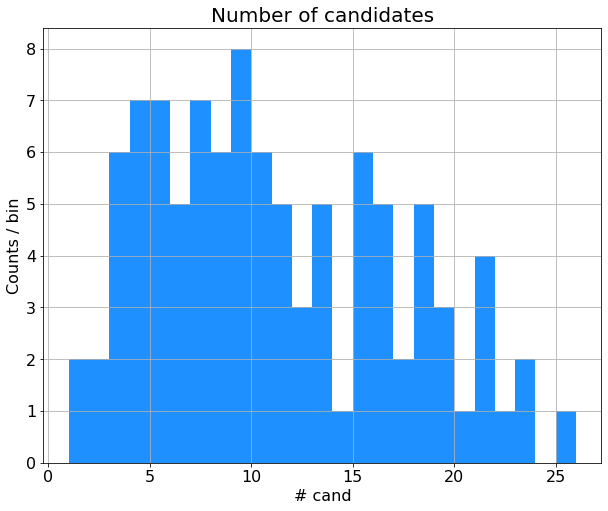

In [15]:
plt.figure(figsize=(10, 8))
myhist(ak.count(candidate_pdgId, axis=1), title= "Number of candidates", xlabel="# cand", bins = 25)
plt.show()

## compute speed between boundary and MTD (troppo vicini)

In [16]:
def distance(x1,y1,z1,x2,y2,z2):
    return ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**0.5

## Compare CP time and TICLCandidate time

In [17]:
# quick plot with list, np array or flattened awkward array
def myhist(X, bins=30, title='title', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', alpha=1, fill='stepfilled', range=None, label="data"):
    #plt.figure(dpi=100)
    if range==None:
        plt.hist(np.array(X), bins=bins, color=color, alpha=alpha, histtype=fill, label=label)
    else:
        plt.hist(np.array(X), bins=bins, color=color, alpha=alpha, histtype=fill, range=range, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()  

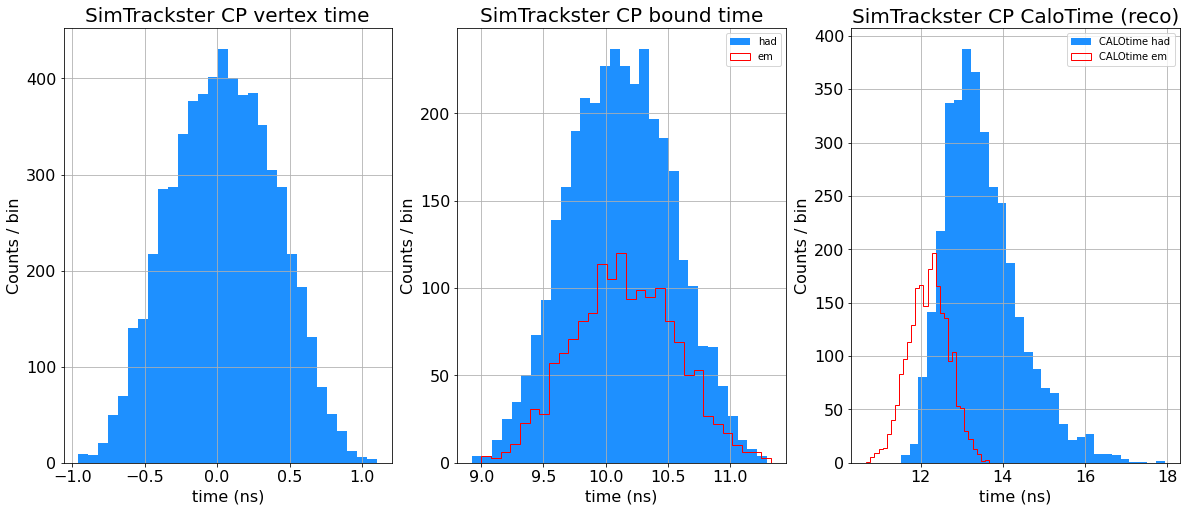

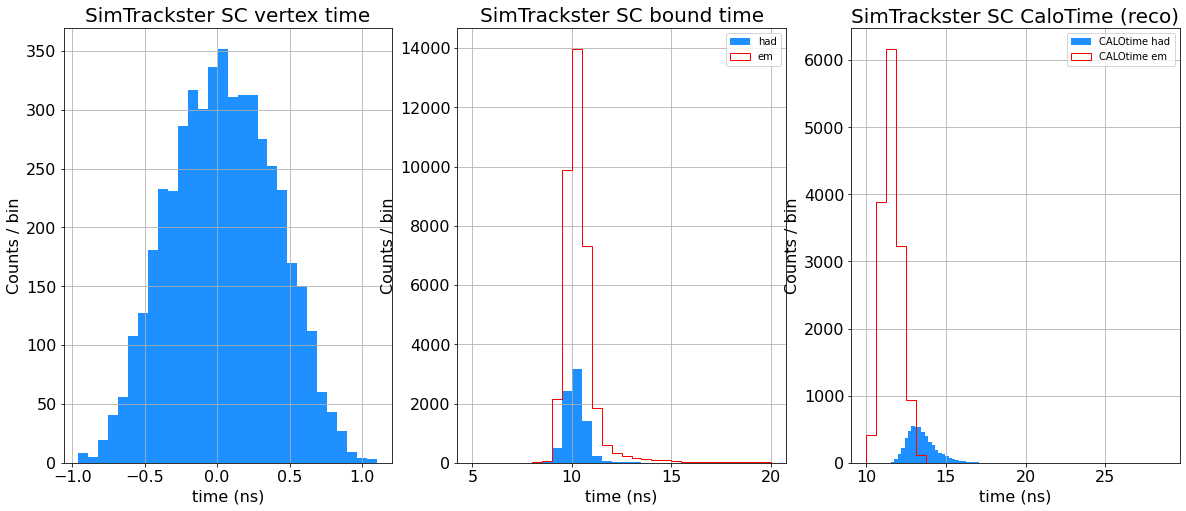

In [17]:
plt.figure(figsize=(20, 8))
plt.subplot(131)
myhist(ak.flatten(CP_vertex_time[CP_vertex_time!=-99]), bins=30, title='SimTrackster CP vertex time', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="MTD time")
plt.subplot(132)
calo_b = CP_boundary_time[CP_boundary_time!=-99]
bary_b = abs(CP_bz[CP_boundary_time!=-99])
myhist(ak.flatten(calo_b[bary_b>=365]), bins=30, title='SimTrackster CP bound time', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="had")
myhist(ak.flatten(calo_b[bary_b<365]), bins=30, title='SimTrackster CP bound time', xlabel='time (ns)', ylabel='Counts / bin', color='red', fill="step", label="em")
plt.grid()
plt.legend()
plt.subplot(133)
bary = abs(CP_bz[CP_CALO_time>-99])
calo = CP_CALO_time[CP_CALO_time>-99]
myhist(ak.flatten(calo[bary >= 365]), bins=30, title='SimTrackster CP CaloTime (reco)', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="CALOtime had")
myhist(ak.flatten(calo[bary < 365]), bins=30, title='SimTrackster CP CaloTime (reco)', xlabel='time (ns)', ylabel='Counts / bin', color='red', fill="step", label="CALOtime em")
plt.grid()
plt.legend()
plt.show()
# plt.savefig("simTsCP.png")

plt.figure(figsize=(20, 8))
plt.subplot(131)
myhist(ak.flatten(SC_vertex_time[SC_vertex_time!=-99]), bins=30, title='SimTrackster SC vertex time', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="MTD time")
plt.subplot(132)
calo_b = SC_boundary_time[SC_boundary_time!=-99]
bary_b = abs(SC_bz[SC_boundary_time!=-99])
myhist(ak.flatten(calo_b[bary_b>=365]), bins=30, range=(5,20), title='SimTrackster SC bound time', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="had")
myhist(ak.flatten(calo_b[bary_b<365]),  bins=30, range=(5,20), title='SimTrackster SC bound time', xlabel='time (ns)', ylabel='Counts / bin', color='red', fill="step", label="em")
plt.grid()
plt.legend()
plt.subplot(133)
bary = abs(SC_bz[SC_CALO_time>-99])
calo = SC_CALO_time[SC_CALO_time>-99]
myhist(ak.flatten(calo[bary >= 365]), bins=30, title='SimTrackster SC CaloTime (reco)', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="CALOtime had")
myhist(ak.flatten(calo[bary < 365]), bins=30, title='SimTrackster SC CaloTime (reco)', xlabel='time (ns)', ylabel='Counts / bin', color='red', fill="step", label="CALOtime em")
plt.grid()
plt.legend()
plt.show()
#plt.savefig("simTsSC.png")

## compute speed

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_825/702765696.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(scamap)


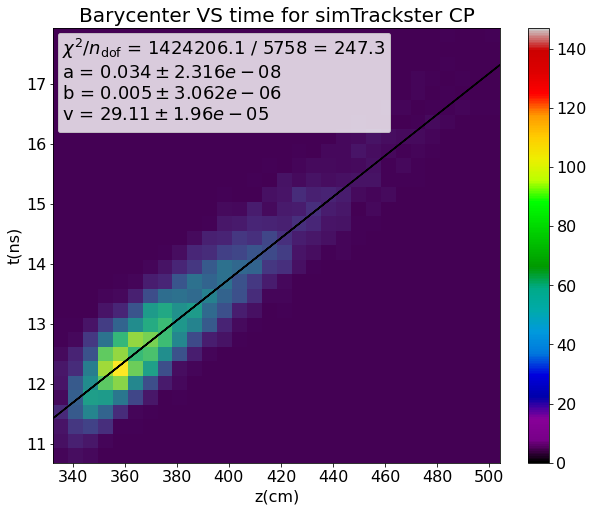

In [18]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

def linear_fit(x, a, b):
    return a * x + b

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(ax2)
# cax = divider.append_axes('right', size='5%', pad=0.05)


fig=plt.figure(figsize=(10, 8))
bary = abs(CP_bz[CP_CALO_time>-99])
calo = CP_CALO_time[CP_CALO_time>-99]
caloErr = CP_CALO_timeErr[CP_CALO_time>-99]*10
hist2, _, _, _ = plt.hist2d(ak.flatten(bary),ak.flatten(calo), bins=30)

least_squares = LeastSquares(np.array(ak.flatten(bary)), np.array(ak.flatten(calo)), np.array(ak.flatten(caloErr)), linear_fit)
m = Minuit(least_squares, a=1/28, b=0.1)
mig = m.migrad() 
hes = m.hesse() 

plt.plot(np.array(ak.flatten(bary)), linear_fit(np.array(ak.flatten(bary)), *m.values), color="black")

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} = {m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3e}$")
fit_info.append(f"v = ${1/m.values[0]:.2f} \\pm {1/m.values[0]**2*m.errors[0]:.2e}$")
    
plt.legend(title="\n".join(fit_info), loc="upper left", labelcolor="white")

plt.ylabel("t(ns)")
plt.xlabel("z(cm)")
norm = mpl.colors.Normalize(vmin=min(ak.flatten(hist2)), vmax=max(ak.flatten(hist2)))
scamap = plt.cm.ScalarMappable(norm=norm, cmap='nipy_spectral')
plt.title("Barycenter VS time for simTrackster CP")
fig.colorbar(scamap)
plt.show()
#plt.savefig("bar_vs_time_simTsCP_pt20_eta2.png")

# ------------------------------

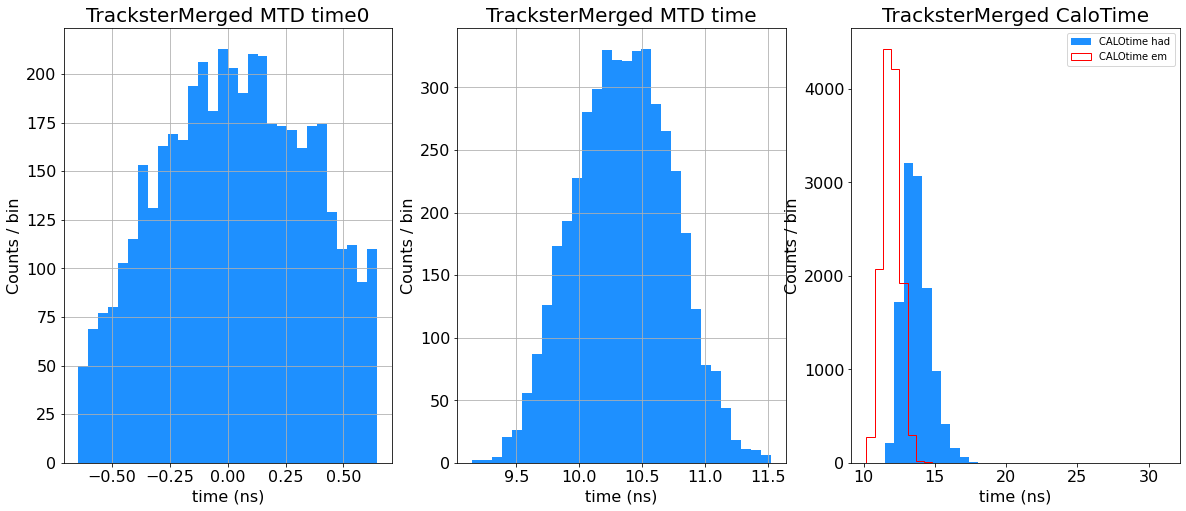

In [19]:
plt.figure(figsize=(20, 8))
plt.subplot(132)
myhist(ak.flatten(tsMerged_MTD_time[tsMerged_MTD_time>0]), bins=30, title='TracksterMerged MTD time', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="MTD time")
plt.subplot(131)
myhist(ak.flatten(tsMerged_MTD_time0[tsMerged_MTD_time0!=-99]), bins=30, title='TracksterMerged MTD time0', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="MTD time 0")
plt.subplot(133)
bary = abs(tsMerged_bz[tsMerged_CALO_time>-99])
calo = tsMerged_CALO_time[tsMerged_CALO_time>-99] 
myhist(ak.flatten(calo[bary > 365]), bins=30, title='TracksterMerged CaloTime', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="CALOtime had")
myhist(ak.flatten(calo[bary < 365]), bins=30, title='TracksterMerged CaloTime', xlabel='time (ns)', ylabel='Counts / bin', color='red', fill="step", label="CALOtime em")
plt.legend()
plt.show()

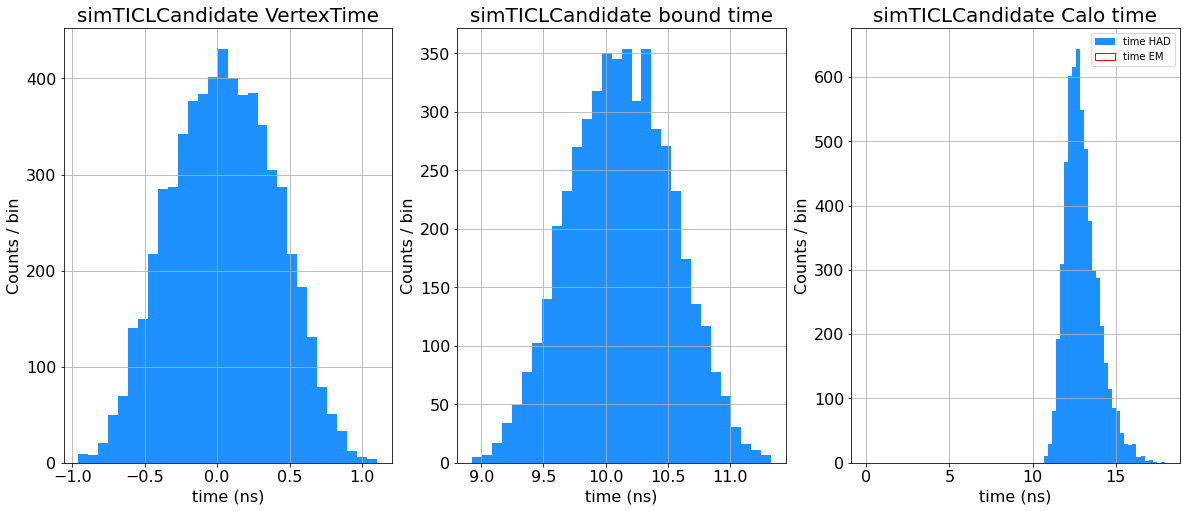

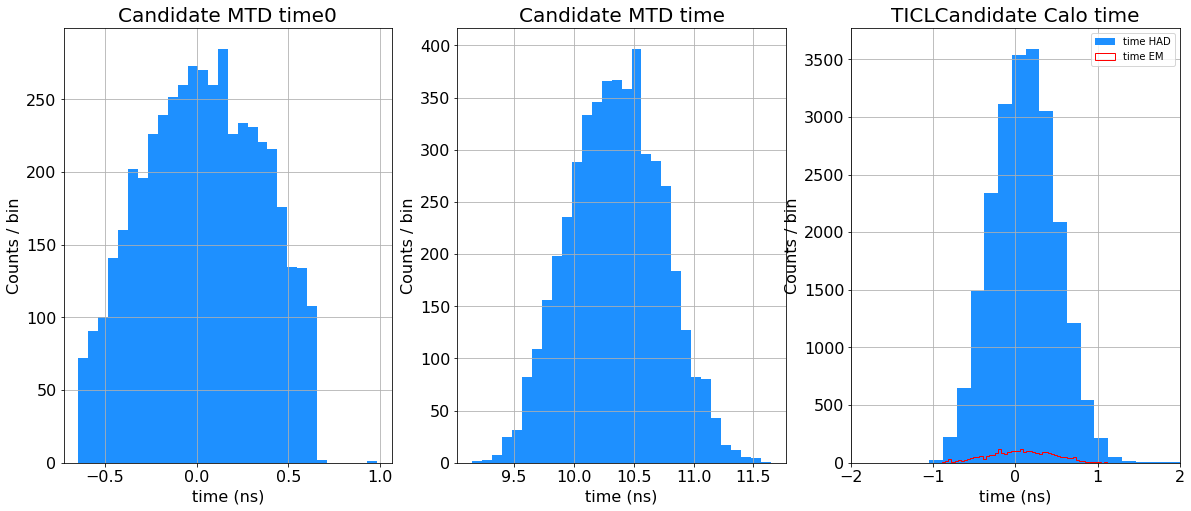

In [20]:
plt.figure(figsize=(20, 8))
plt.subplot(133)
pdg = abs(SIMcandidate_pdgId[SIMcandidate_time>-99])
calo = SIMcandidate_time[SIMcandidate_time>-99] 
myhist(ak.flatten(calo[pdg > 100]), bins=30, title='simTICLCandidate Calo time', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="time HAD")
myhist(ak.flatten(calo[pdg <= 100]), bins=30, title='simTICLCandidate Calo time', xlabel='time (ns)', ylabel='Counts / bin', color='red', fill="step", label="time EM")
plt.legend()
plt.grid()
plt.subplot(132)
myhist(ak.flatten(SIMcandidate_boundary_time[SIMcandidate_boundary_time>-99]), bins=30, title='simTICLCandidate bound time', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="MTD time 0")
plt.subplot(131)
myhist(ak.flatten(SIMcandidate_vertex_time[SIMcandidate_vertex_time>-99]), bins=30, title='simTICLCandidate VertexTime', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="CALOtime had")
# plt.legend()
plt.show()

plt.figure(figsize=(20, 8))
plt.subplot(131)
myhist(ak.flatten(candidate_MTD_time0[candidate_MTD_time0>-99]), bins=30, title='Candidate MTD time0', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="MTD time")
plt.subplot(132)
myhist(ak.flatten(candidate_MTD_time[candidate_MTD_time>-0]), bins=30, title='Candidate MTD time', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="MTD time 0")
plt.subplot(133)
pdg = abs(candidate_pdgId[candidate_time>-99])
calo = candidate_time[candidate_time>-99]
myhist(ak.flatten(calo[pdg > 100]), bins=100, title='TICLCandidate Calo time', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="time HAD")
myhist(ak.flatten(calo[pdg <= 100]), bins=100, title='TICLCandidate Calo time', xlabel='time (ns)', ylabel='Counts / bin', color='red', fill="step", label="time EM")
plt.legend()
plt.grid()
plt.xlim(-2,2)
plt.show()

In [21]:
print(SIMcandidate_vertex_time[0])

[-0.396, -0.696, -0.196, -0.896, 0.00389, -0.496]


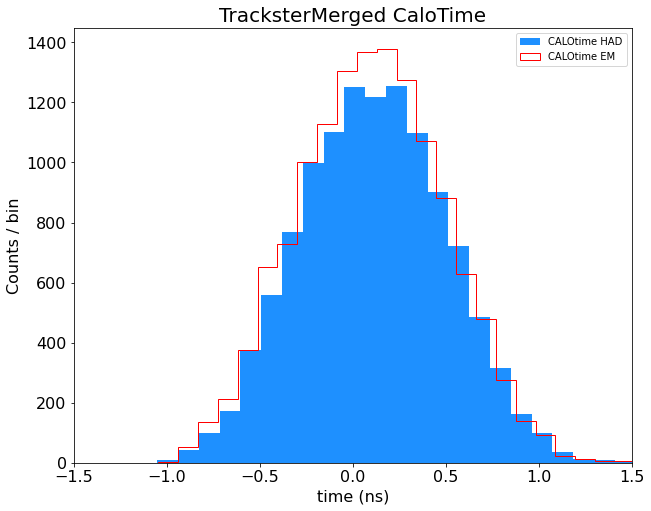

In [23]:
pathTime = (tsMerged_bx**2+tsMerged_by**2+tsMerged_bz**2)**0.5/29.9792458
timeAtVtx = tsMerged_CALO_time - pathTime
bary = abs(tsMerged_bz[timeAtVtx>-99])
calo = timeAtVtx[timeAtVtx>-99] 
plt.figure(figsize=(10, 8))
myhist(ak.flatten(calo[bary >= 365]), bins=150, title='TracksterMerged CaloTime', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="CALOtime HAD")
myhist(ak.flatten(calo[bary < 365]), bins=150, title='TracksterMerged CaloTime', xlabel='time (ns)', ylabel='Counts / bin', color='red', fill="step", label="CALOtime EM")
# myhist(ak.flatten(calo), bins=150, title='TracksterMerged CP CaloTime', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="CALOtime had")
plt.legend()
plt.xlim(-1.5,1.5)
plt.show()

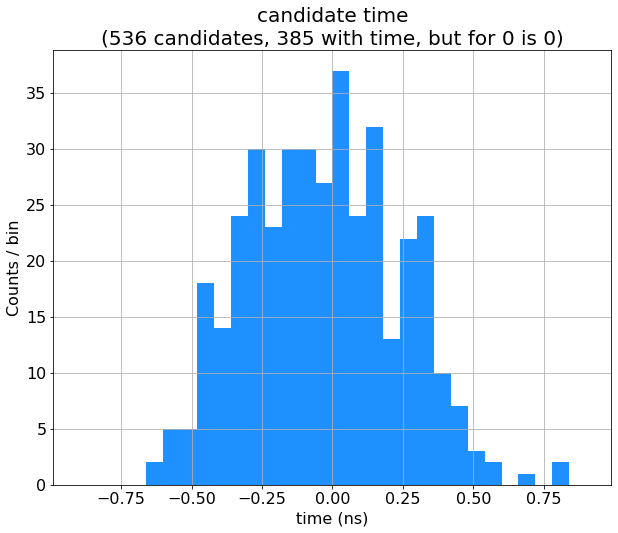

536


In [21]:
# plt.figure(figsize=(10, 8))
# ncand = len(ak.flatten(candidate_MTD_time0))
# ncandtime = len(ak.flatten(candidate_MTD_time0[candidate_MTD_time0>-99]))
# cc = ak.flatten(candidate_MTD_time0[candidate_MTD_time0>-99])
# cc = cc[cc!=0]
# myhist(ak.flatten(candidate_MTD_time0[candidate_MTD_time0>-99]), range=(-0.9,0.9), bins=30, title=f'candidate time\n({ncand} candidates, {ncandtime} with time, but for {ncandtime-len(cc)} is 0)', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="MTD time")
# plt.show()
# print(ncand)
plt.figure(figsize=(10, 8))
ncand = len(ak.flatten(candidate_time))
ncandtime = len(ak.flatten(candidate_time[candidate_time>-99]))
cc = ak.flatten(candidate_time[candidate_time>-99])
cc = cc[cc!=0]
myhist(ak.flatten(candidate_time[candidate_time>-99]), range=(-0.9,0.9), bins=30, title=f'candidate time\n({ncand} candidates, {ncandtime} with time, but for {ncandtime-len(cc)} is 0)', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="MTD time")
plt.show()
print(ncand)

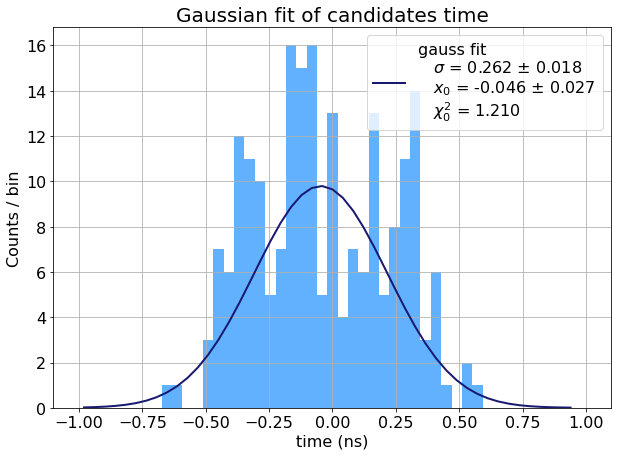

In [14]:
plt.figure(figsize=(10,7))
a = ak.flatten(candidate_time[candidate_timeErr>0])
res, chi2 = gauss_fit_and_plot(a[a<1], init_parms=[1000,0,0.3], label="reco", bins=np.linspace(-1,1,50))
plt.title("Gaussian fit of candidates time")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.legend(fontsize=16)
plt.show()

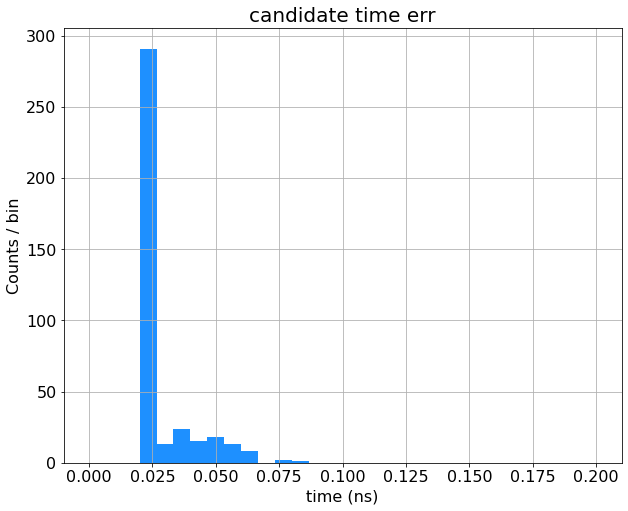

In [25]:
plt.figure(figsize=(10, 8))
myhist(ak.flatten(candidate_timeErr[candidate_time>-99]), range=(0,0.2), bins=30, title='candidate time err', xlabel='time (ns)', ylabel='Counts / bin', color='dodgerblue', label="MTD time")
plt.show()

## candidate time validation

In [16]:
# returns res that contains the parameters, the chi squared and 
# the counts and bins used to plot the data
def gauss_fit(data, init_parms, bins=300):
    hist, nbins = np.histogram(data, bins=bins)
    nbins = 0.5 * (bins[1:] + bins[:-1])
    errors = [np.sqrt(oh+1) for oh in hist]
    init_parameters = init_parms
    cost_func = cost.LeastSquares(nbins, hist, errors, model)
    min_obj = Minuit(cost_func, *init_parameters)
    res = min_obj.migrad()
    chi2 = min_obj.fval/(len(nbins[:-1])-3)
    return res, chi2, hist, nbins[:-1]

#same as above but plots also the data
def gauss_fit_and_plot(data, init_parms, label="data", colors=["midnightblue","dodgerblue"], bins=300):
    res, chi2, hists, newbins = gauss_fit(data, init_parms, bins=bins)
    y = model(newbins, *res.values)
    plt.plot(newbins, y, label=f'gauss fit\n   $\sigma$ = {res.values[2]:.3f} $\pm$ {res.errors[2]:.3f}\n   $x_0$ = {res.values[1]:.3f} $\pm$ {res.errors[1]:.3f} \n   $\chi^2_0$ = {chi2:.3f}', color=colors[0], linewidth=2)
    plt.hist(np.array(data), bins=bins, color=colors[1], alpha=0.7)
    plt.legend(fontsize=16)
    plt.grid()
    return res, chi2

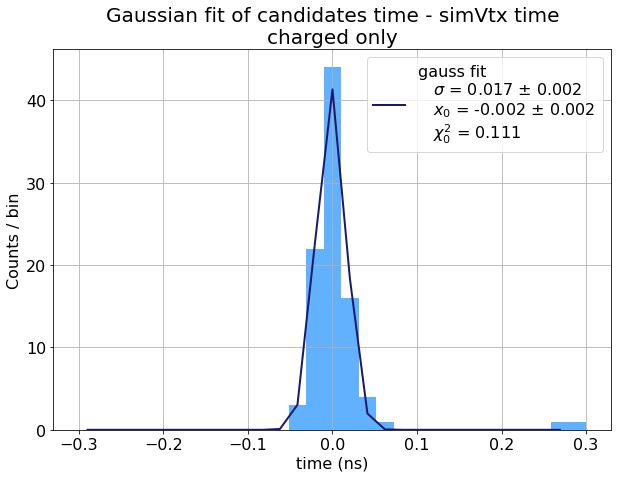

In [20]:
dt_vtx = []
for ev, simTime in enumerate(SIMcandidate_vertex_time):
    simVxt = simTime[0]
    candsPDG = candidate_pdgId[ev]
    cands = candidate_time[ev]
#     cands = candidate_MTD_time0[ev]
    candsErr = candidate_timeErr[ev]
#     print(cands[cands!=-99], "\n", candsPDG[cands!=-99])
    candsPDG = candsPDG[cands!=-99]
    candsErr = candsErr[cands!=-99]
    cands = cands[cands!=-99]
    for cand, candPDG in zip(cands, candsPDG):
        if (abs(candPDG)==11 or abs(candPDG)==211):
            dt_vtx.append(cand - simVxt)
        
plt.figure(figsize=(10,7))
# [np.array(dt_vtx)<1]
res, chi2 = gauss_fit_and_plot(np.array(dt_vtx)[np.array(dt_vtx)>-0.3], init_parms=[175,0,0.03], label="reco", bins=np.linspace(-0.3,0.3, 30))
plt.title("Gaussian fit of candidates time - simVtx time\ncharged only")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.legend(fontsize=16)
plt.show()

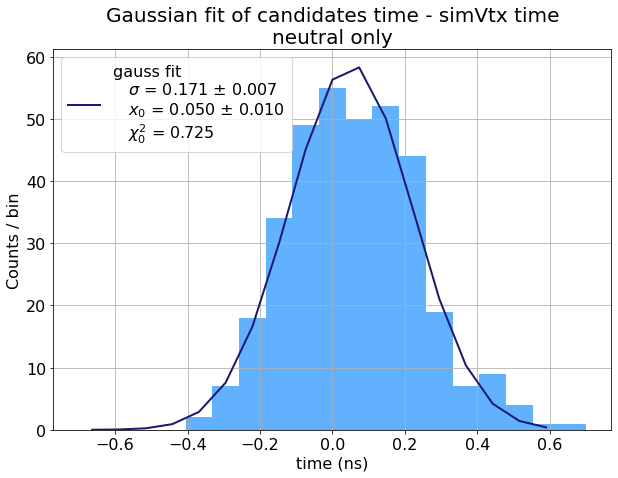

In [21]:
dt_vtx = []
for ev, simTime in enumerate(SIMcandidate_vertex_time):
    simVxt = simTime[0]
    candsPDG = candidate_pdgId[ev]
    cands = candidate_time[ev]
#     cands = candidate_MTD_time0[ev]
    candsErr = candidate_timeErr[ev]
    ts_in_cand = tracksters_in_candidate[ev]
    ts_time = tracksters_vt[ev]
#     print(cands[cands!=-99], "\n", candsPDG[cands!=-99])
    candsPDG = candsPDG[cands!=-99]
    candsErr = candsErr[cands!=-99]
    cands = cands[cands!=-99]
    for cand, candPDG, ts in zip(cands, candsPDG, ts_in_cand):
        nLCmax = 0
        if (abs(candPDG)==130 or abs(candPDG)==22):
            ####
            # THIS is done to select only candidates with at least one tsMerged with > 7 LCs !
#             for tidx in ts:
# #                 print(ts_time[tidx])
#                 if len(ts_time[tidx])> nLCmax:
#                     nLCmax = len(ts_time[tidx])
# #             print("--",nLCmax,"--")
#             if nLCmax <= 7:
#                 continue
            ####
            dt_vtx.append(cand - simVxt)
#         print("---")
        
plt.figure(figsize=(10,7))
# [np.array(dt_vtx)<1]
res, chi2 = gauss_fit_and_plot(np.array(dt_vtx)[np.array(dt_vtx)<1], init_parms=[175,0,0.1], label="reco", bins=np.linspace(-0.7, 0.7, 20))
plt.title("Gaussian fit of candidates time - simVtx time\nneutral only")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.legend(fontsize=16)
plt.show()

## trackster time validation

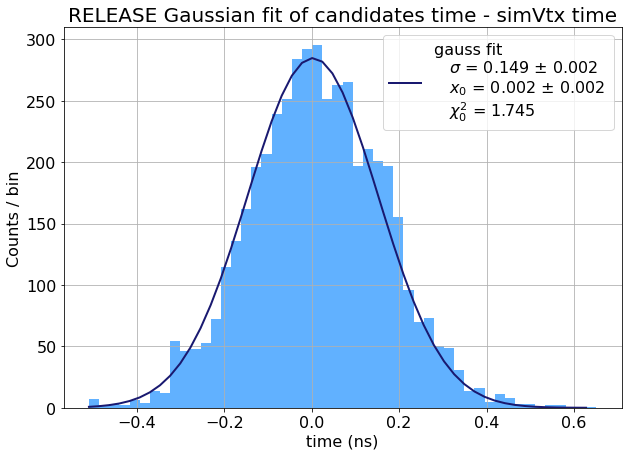

In [209]:
dt_vtx = []
for ev, simTime in enumerate(SIMcandidate_vertex_time):
    simVxt = simTime[0]*10**9
#     cands = candidate_MTD_time0[ev]
    cands = candidate_time2[ev]
    candsErr = candidate_timeErr2[ev]
    cands = cands[cands!=-99]
    candsErr = candsErr[cands!=-99]
    for cand, candErr in zip(cands, candsErr):
        dt_vtx.append(cand - simVxt)
        
plt.figure(figsize=(10,7))
res, chi2 = gauss_fit_and_plot(np.array(dt_vtx)[np.array(dt_vtx)<1], init_parms=[2000,0,0.3], label="reco", bins=50)
plt.title("RELEASE Gaussian fit of candidates time - simVtx time")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.legend(fontsize=16)
plt.show()

In [22]:
MR = 3

In [ ]:
# ve = CP_ve[ev][0]
# vi = CP_vi[ev][0]
# 
# vtErr = CP_vtErr[ev][0]
# vm = CP_vm[ev][0]

time_all = []
for ev in range(len(CP_CALO_time)):
    time_ts = 0
    n_ts = 0
    vx = CP_vx[ev][0]
    vy = CP_vy[ev][0]
    vz = CP_vz[ev][0]
    vt = CP_vt[ev][0]
#     vx = vx[vt!=-99]
#     vy = vy[vt!=-99]
#     vz = vz[vt!=-99]
#     vt = vt[vt!=-99]
    for i, t in enumerate(vt):
        if t != -99 and project_lc_to_pca(np.array([vx[i], vy[i], vz[i]]), np.array([0,0,0]), np.array([CP_bx[ev][0], CP_by[ev][0], CP_bz[ev][0]]))[0] < MR and abs(CP_bz[ev][0] - vz[i]) < 100:
#             factor = ((vz[i]-CP_bz[ev][0])/abs(vz[i]-CP_bz[ev][0]))*(vz[i]/abs(vz[i]))
            if abs(CP_bz[ev][0])< abs(vz[i]):
                time_ts += t - distance(CP_bx[ev][0], CP_by[ev][0], CP_bz[ev][0], vx[i], vy[i], vz[i])/C
                n_ts+=1
            else:
                time_ts += t + distance(CP_bx[ev][0], CP_by[ev][0], CP_bz[ev][0], vx[i], vy[i], vz[i])/C
                n_ts+=1
    if n_ts == 0:
        time_all.append([-99])
    else:
        time_all.append([time_ts/n_ts])
    #print(n_ts, len(vt[vt!=-99]))

In [ ]:
## calcolo in vari modi che voglio il tmempo del trackster e poi propago sul tempo al boundary (c - retta) e vedo
## ha senso minimizzare la risoluzione e non la media? per il bias di c-retta
TIME = CP_CALO_time # ak.Array(time_all) #
deltaT = TIME[CP_boundary_time!=-99] - CP_boundary_time[CP_boundary_time!=-99]
deltaS = distance(CP_boundx[CP_boundary_time!=-99], CP_boundy[CP_boundary_time!=-99], CP_boundz[CP_boundary_time!=-99], 
                  CP_bx[CP_boundary_time!=-99], CP_by[CP_boundary_time!=-99], CP_bz[CP_boundary_time!=-99])
results = deltaT - deltaS / C
err = CP_CALO_timeErr #(?)

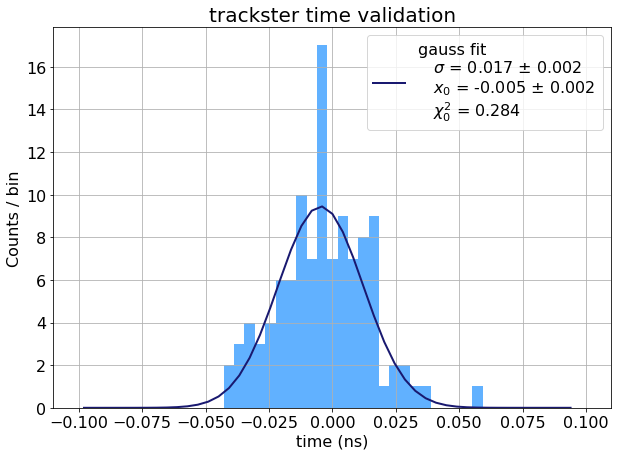

In [34]:
plt.figure(figsize=(10,7))
resu = ak.flatten(results[results>-99])
res, chi2 = gauss_fit_and_plot(resu, init_parms=[30,0,0.03], label="reco", bins=np.linspace(-0.1,0.1,50))
#plt.hist(resu)
plt.title("trackster time validation")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.legend(fontsize=16)
plt.show()

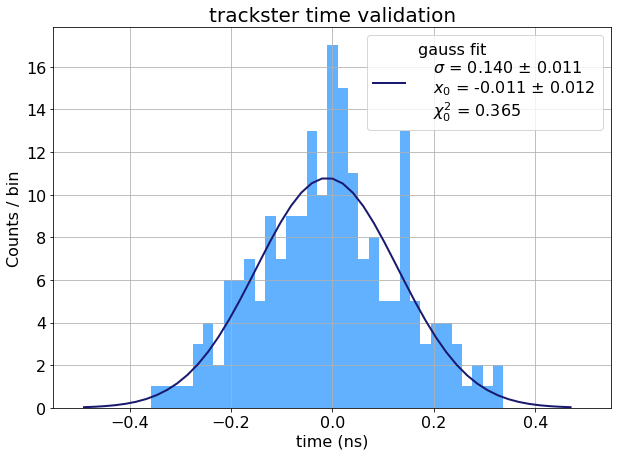

In [35]:
## calcolo in vari modi che voglio il tmempo del trackster e poi propago sul tempo al vertex (c - retta) e vedo
## ha senso minimizzare la risoluzione e non la media? per il bias di c-retta
TIME = CP_CALO_time # ak.Array(time_all) #
deltaT = TIME[CP_CALO_time!=-99] - CP_vertex_time[CP_CALO_time!=-99]
deltaS = distance(0,0,0, 
                  CP_bx[CP_CALO_time!=-99], CP_by[CP_CALO_time!=-99], CP_bz[CP_CALO_time!=-99])
results = deltaT - deltaS / C

plt.figure(figsize=(10,7))
resu = ak.flatten(results[results>-99])
res, chi2 = gauss_fit_and_plot(resu, init_parms=[30,0,0.03], label="reco", bins=np.linspace(-0.5,0.5,50))
#plt.hist(resu)
plt.title("trackster time validation")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.legend(fontsize=16)
plt.show()

## MTD - HGCAL time validation

In [30]:
deltaT = - SC_boundary_time[SC_MTD_time!=-99] + SC_MTD_time[SC_MTD_time!=-99]
deltaS = distance(ak.flatten(SC_MTD_posX[SC_MTD_time!=-99]), 
                  ak.flatten(SC_MTD_posY[SC_MTD_time!=-99]), 
                  ak.flatten(SC_MTD_posZ[SC_MTD_time!=-99]), 
                  ak.flatten(SC_boundx[SC_MTD_time!=-99]), 
                  ak.flatten(SC_boundy[SC_MTD_time!=-99]), 
                  ak.flatten(SC_boundz[SC_MTD_time!=-99])) #CP_bx[CP_MTD_time!=-99], CP_by[CP_MTD_time!=-99], CP_bz[CP_MTD_time!=-99])
results = ak.flatten(deltaT) - deltaS / C

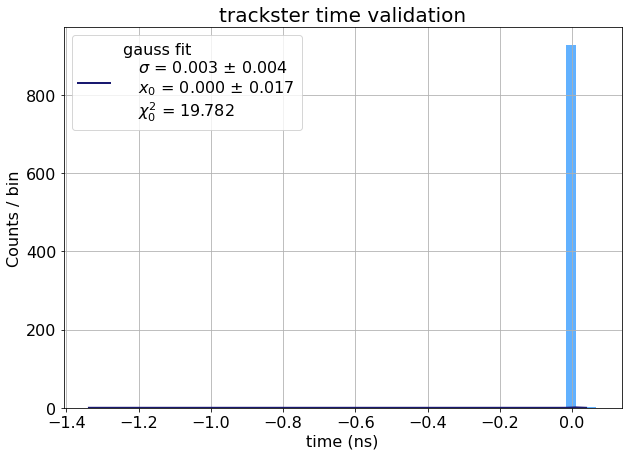

In [31]:
plt.figure(figsize=(10,7))
resu = results[results>-99]
res, chi2 = gauss_fit_and_plot(resu[resu<0.1], init_parms=[400,0,0.003], label="reco", bins=50)
#plt.hist(resu)
plt.title("trackster time validation")
plt.xlabel("time (ns)")
plt.ylabel("Counts / bin")
plt.legend(fontsize=16)
plt.show()

## trackster time visualization

In [18]:
# point is a list [x,y,z]

def prop_to_bar(point, z_bar):
    # Define a line by its direction vector and a point on it
    line_dir = point # direction vector of the line
    line_pt = [0, 0, 0] # a point on the line

    # Define a plane by its normal vector and a point on it
    plane_norm = [0,0,1] # normal vector of the plane
    plane_pt = [0,0,z_bar] # a point on the plane

    # Compute the dot product of the line direction and the plane normal
    dot_prod = sum([a*b for a,b in zip(line_dir, plane_norm)])

    # Check if the dot product is zero, which means the line is parallel to the plane
    if dot_prod == 0:
        print("The line is parallel to the plane. No intersection point.")
        return [0,0,0]
    else:
        # Compute the parameter t that gives the intersection point
        t = sum([(a-b)*c for a,b,c in zip(plane_pt, line_pt, plane_norm)]) / dot_prod

        # Compute the intersection point by plugging t into the line equation
        inter_pt = [a + b*t for a,b in zip(line_pt, line_dir)]

        return inter_pt

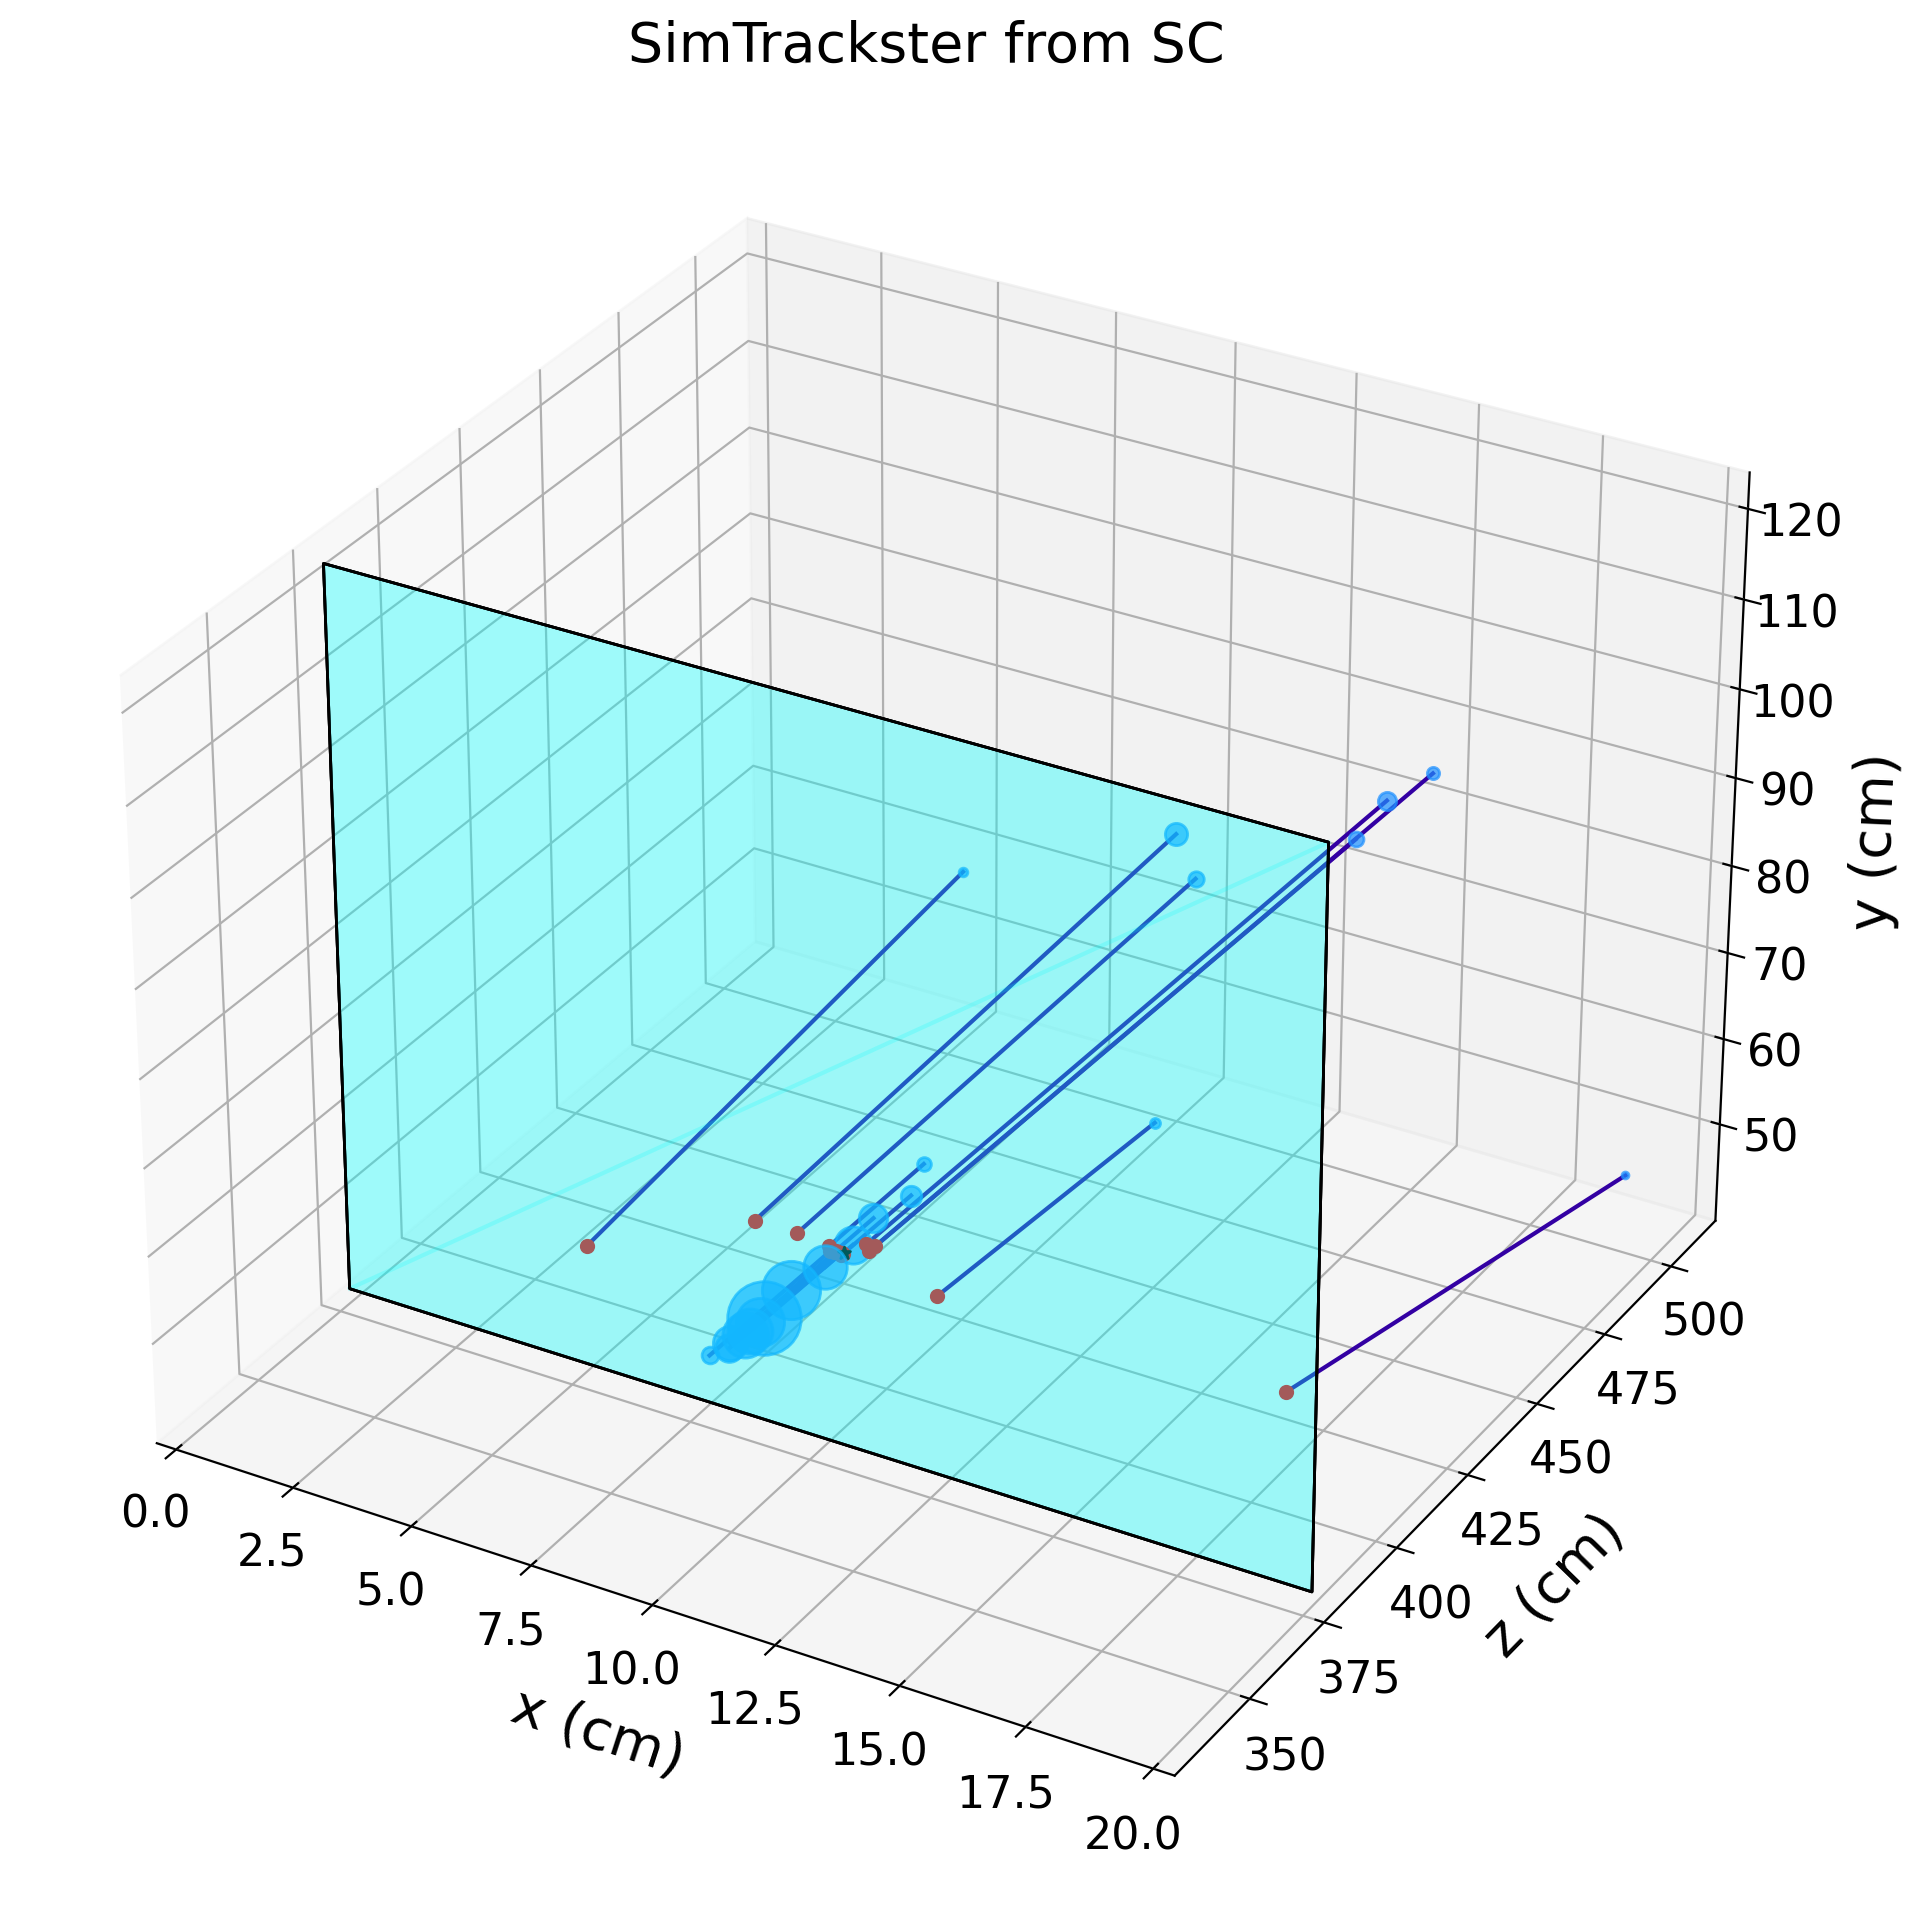

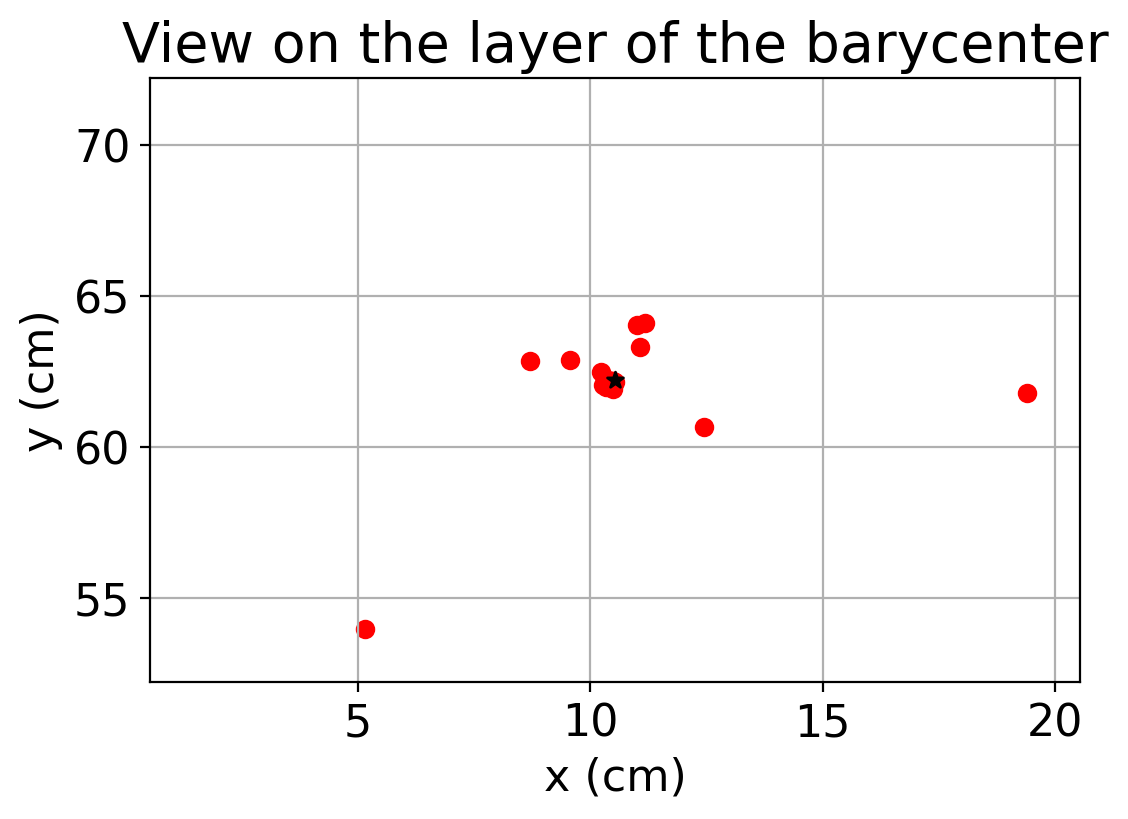

In [61]:
%matplotlib inline
eid = 16
tid = 1
fig = plt.figure(figsize=(12,12))#, dpi=200)
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("\nx (cm)", fontsize=20)
ax1.set_zlabel("\ny (cm)", fontsize=20)
ax1.set_ylabel("\nz (cm)", fontsize=20)

ax1.set_xlim(0,20)#, ak.max(SC_vx[eid][tid])) #ak.min(SC_vx[eid][tid])
ax1.set_zlim(ak.min(SC_vy[eid][tid]), ak.max(SC_vy[eid][tid]))
ax1.set_ylim(ak.min(SC_vz[eid][tid]), ak.max(SC_vz[eid][tid]))

x_points = []
y_points = []

tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(SC_vx[eid], SC_vy[eid], SC_vz[eid], SC_ve[eid], SC_vt[eid], SC_vi[eid], SC_vm[eid])

for i, [x, y, z, e, t] in enumerate(zip(tx2, ty2, tz2, te2, tt2)): #SC_vx[eid][tid], SC_vy[eid][tid], SC_vz[eid][tid], SC_ve[eid][tid], SC_vt[eid][tid])): #tx2, ty2, tz2, te2):
    if (t!=-99):
        ax1.scatter(x, z, y, s=5*e, c="dodgerblue", alpha=0.7)
        point_on_bar = prop_to_bar([x,y,z], SC_bz[eid][tid])
        ax1.scatter(point_on_bar[0], point_on_bar[2], point_on_bar[1], c="red")
        ax1.plot([point_on_bar[0], x], [point_on_bar[2], z], [point_on_bar[1], y], c="#3300a3")
        x_points.append(point_on_bar[0])
        y_points.append(point_on_bar[1])
        
a=(0,ak.min(SC_vy[eid][tid]), SC_bz[eid][tid]) #ak.min(SC_vx[eid][tid])
b=(20,ak.max(SC_vy[eid][tid]), SC_bz[eid][tid]) #ak.max(SC_vx[eid][tid])
plot_cube(a, b, ax1)

ax1.scatter(SC_bx[eid][tid], SC_bz[eid][tid], SC_by[eid][tid], c="black", marker="*", s=20)
ax1.set_title(f"SimTrackster from SC")
plt.savefig("3d_tsTimeProg.png")
plt.show()

plt.figure(dpi=200)
plt.scatter(x_points, y_points, c="red")
plt.scatter(SC_bx[eid][tid], SC_by[eid][tid], c="black", marker="*")
plt.title("View on the layer of the barycenter")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(SC_bx[eid][tid]-10, SC_bx[eid][tid]+10)
plt.ylim(SC_by[eid][tid]-10, SC_by[eid][tid]+10)
plt.grid()
# plt.savefig("2d_tsTimeProg.png")
plt.show()